In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
from time import time

In [2]:
dataset = pd.read_csv('loan_data.csv')

# 1. EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
dataset.head(5) # display first 5 rows of the dataset

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# Analysing the data attributes
print("Number of Rows: {}". format(dataset.shape[0]))
print("Number of Columns: {}". format(dataset.shape[1]))
dataset.info()

Number of Rows: 9578
Number of Columns: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
dataset.describe() # description of the data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
dataset.isna().sum() # check for missing data

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
dataset.duplicated().sum() # check for duplicates, 

0

In [8]:
#Replacing dots in column names with underscore
dataset.columns = dataset.columns.str.replace(".","_")
dataset.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

# 1.1. EDA for class attribute "not_fully_paid"

0    8045
1    1533
Name: not_fully_paid, dtype: int64
Not fully paid is  16.01 % of the dataset


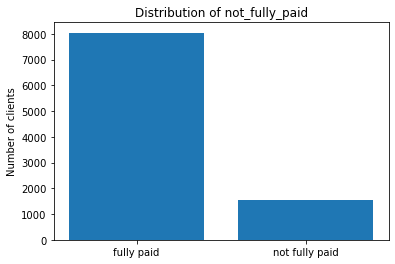

In [9]:
# Count values in 'not_fully_paid' attribute: 0 = fully paid, 1 = not fully paid.
print(dataset['not_fully_paid'].value_counts())
print('Not fully paid is ', round(dataset['not_fully_paid'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

# Distribution of not_fully_paid on bar plot
x = ['fully paid', 'not fully paid']
y = dataset['not_fully_paid'].value_counts() 
plt.bar(x,y)
plt.ylabel('Number of clients')
plt.title('Distribution of not_fully_paid')
plt.show()

# 1.2. EDA for nominal attribute "purpose":

In [10]:
# Count values in 'purpose' attribute
dataset['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

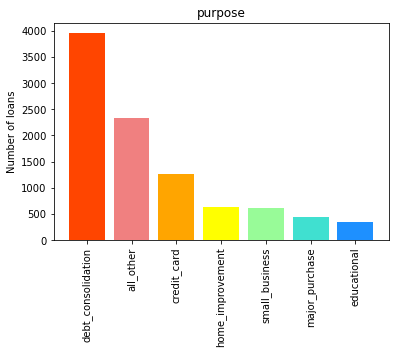

In [11]:
# DISTRIBUTION OF LOANS BASED ON PURPOSE OF BORROWING:

# put unique values of "purpose" into a list:
list_1= dataset['purpose'].value_counts().index.tolist()
# list of values in 'purpose' attribute
list_2 = dataset['purpose'].value_counts().to_list()

# Distribution of loans based on purpose
x = list_1
y = list_2
c = ['orangered', 'lightcoral', 'orange', 'yellow', 'palegreen', 'turquoise', 'dodgerblue']

plt.bar(x,y, color = c)
plt.xticks(ticks = x, labels = list_1, rotation = 'vertical')
plt.ylabel('Number of loans')
plt.title('purpose')
plt.show()

In [12]:
#count values of not_fully_paid of each purpose
dataset_not_fully_paid = dataset[dataset['not_fully_paid'] == 1]
print("Number of not fully paid loan based on purpose: ")
print(dataset_not_fully_paid["purpose"].value_counts())

Number of not fully paid loan based on purpose: 
debt_consolidation    603
all_other             387
small_business        172
credit_card           146
home_improvement      107
educational            69
major_purchase         49
Name: purpose, dtype: int64


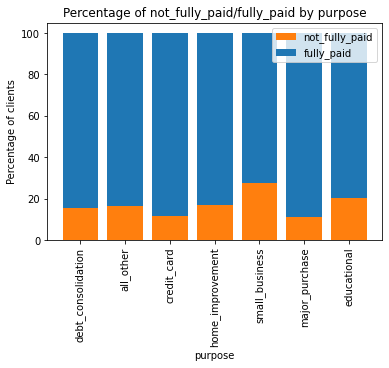

In [13]:
# STACKED BAR PLOT OF PERCENTAGE OF NOT_FULLY_PAID/ FULLY_PAID BASED ON PURPOSE.

# put not fully paid values correspondent to list of purpose (list_1) into a list
list_3 = [603, 387, 146, 107, 172, 49, 69]
# Calculate percentage of not_fully_paid to total_loans
list_4 = [] # list of percentage of not_fully_paid over total_loans based on purpose
i = 0
j=0
while i < len(list_3):
    while j< len(list_2):
        x = round(list_3[i]/list_2[j]*100,2)
        i = i +1
        j = j +1
        list_4.append(x)
# Calculate percentage of fully_paid to total_loans
list_5 = [] # # list of percentage of fully_paid over total_loans based on purpose
for i in list_4:
    x = round((100 - i),2)
    list_5.append(x) 

# Plot stacked bar chart
not_fully_paid = plt.bar(list_1,list_4, color = "tab:orange") # plot the first bars 
fully_paid = plt.bar(list_1,list_5, bottom=list_4, color = "tab:blue")#Set bottom of the next bars equals to 
                                                                      #the values of the previous bars.
# Set title and labels
plt.xlabel('purpose')
plt.ylabel('Percentage of clients')
plt.title('Percentage of not_fully_paid/fully_paid by purpose')
plt.xticks(ticks = list_1, labels = list_1, rotation = 'vertical')
# Add a legend
plt.legend(handles = [not_fully_paid, fully_paid], 
           labels  = ['not_fully_paid', 'fully_paid'])
plt.show()# Visualize the final plot

# 1.3. EDA for Numerical Attributes 

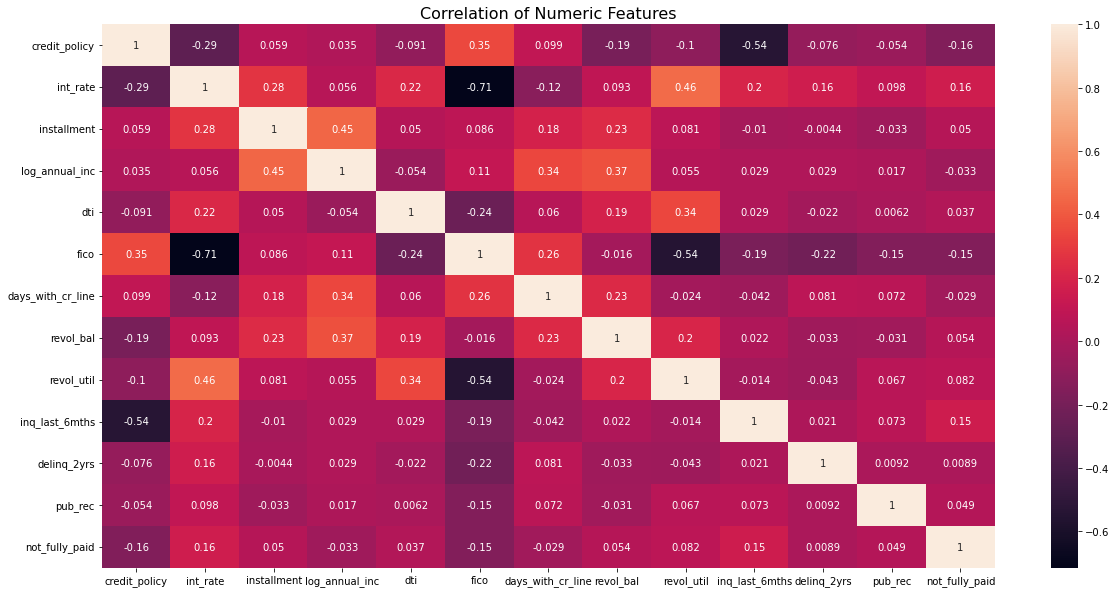

In [14]:
# CORRELATION BETWEEN NUMERIC ATTRIBUTES
# heatmap to find out the correlation between numeric features
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True)
plt.title('Correlation of Numeric Features',y=1,size=16)
plt.show()

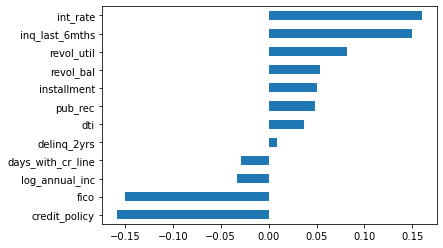

In [15]:
corr = dataset.corr()
corr['not_fully_paid'].sort_values()[:-1].plot(kind='barh')
#plt.title('Correlation with class attribute "not_fully_paid"' ,size=20)

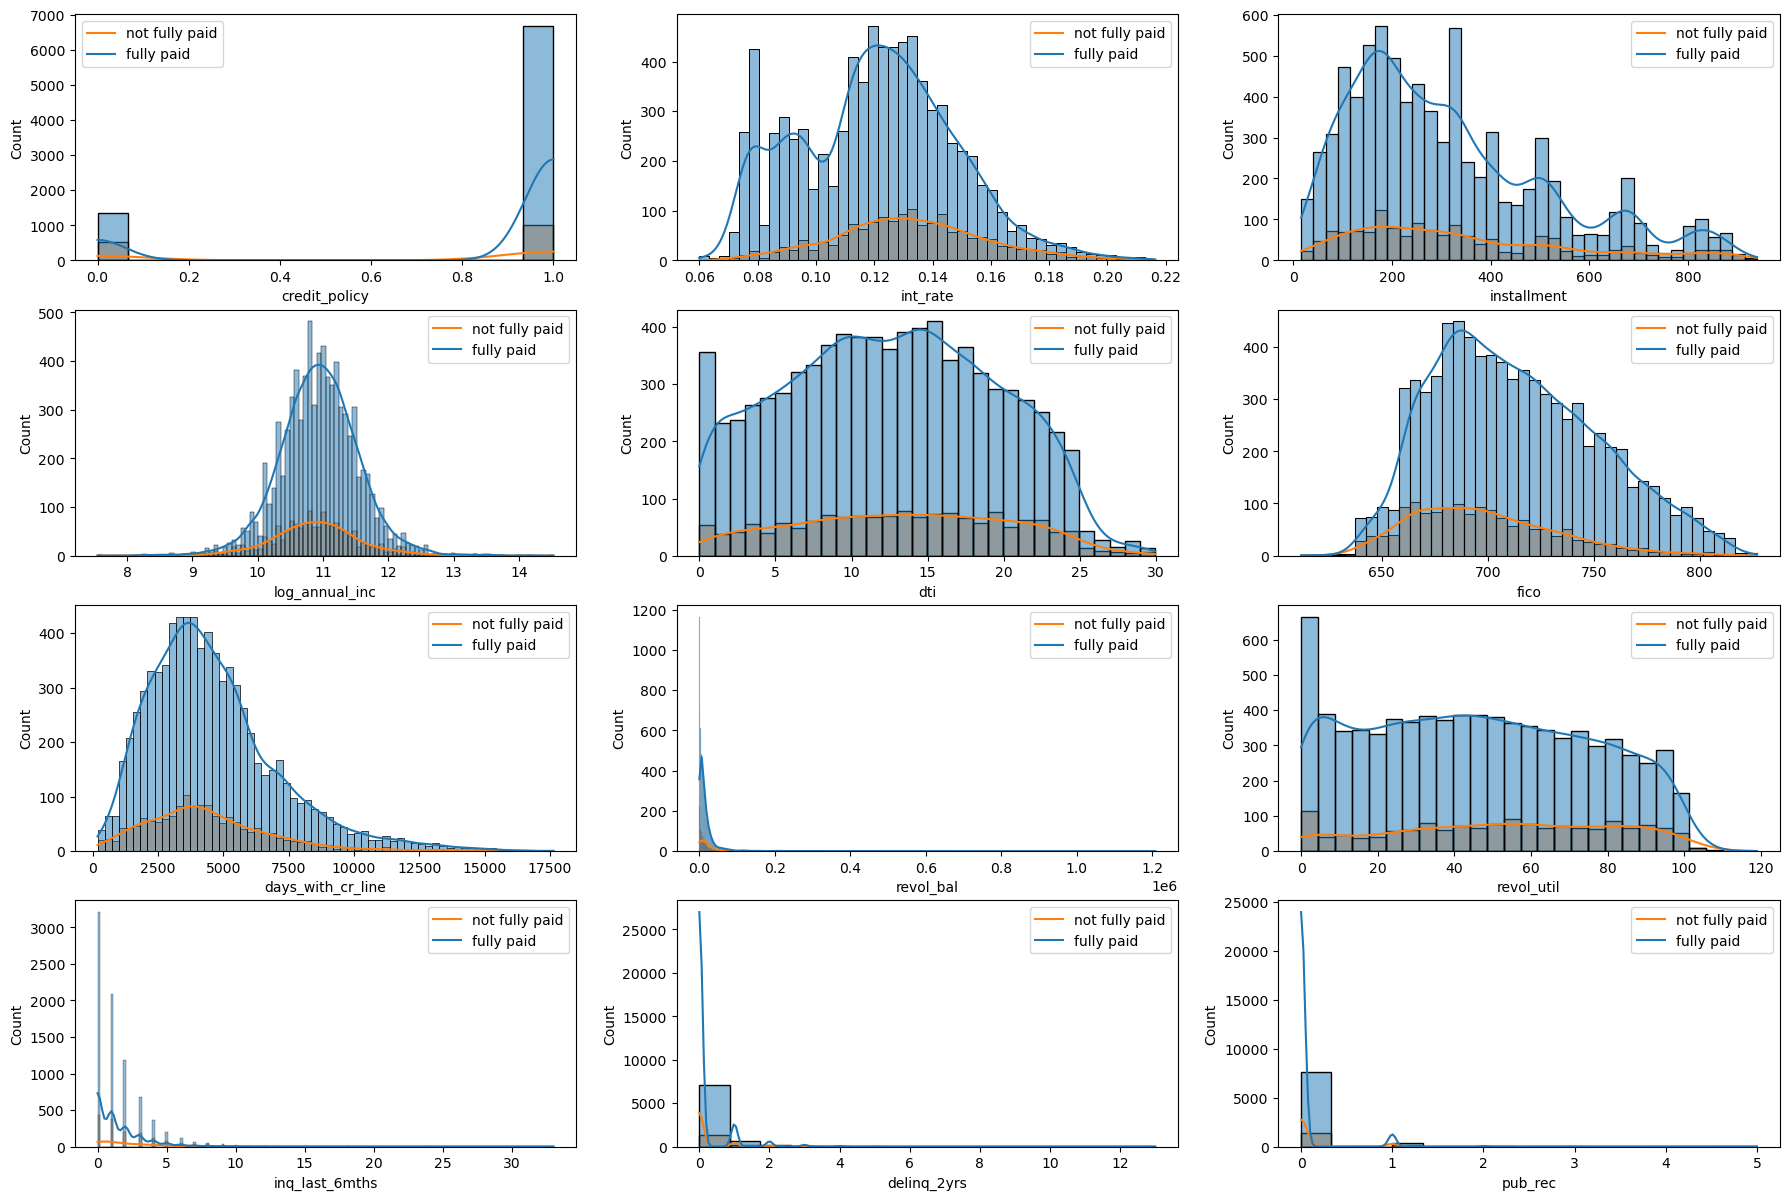

In [16]:
#DISTRIBUTION OF NUMERICAL ATTRIBUTES

# Selecting numerical features
numeric_features = dataset.select_dtypes(['int64', 'float64']).columns[:-1]

# Creating figure and axes
fig, ax = plt.subplots(4,3, figsize=(22,15), dpi=100)
ax=ax.ravel()

# Loop through columns and creating histograms comparing the two groups
count=0
for i in numeric_features:
    sns.histplot(data=dataset, x=i, hue='not_fully_paid', ax=ax[count], kde=True, legend=True, color='green')
    ax[count].legend(['not fully paid','fully paid'])
    count+=1

#  credit_policy

Meet credit criteria 80.5 % of the dataset
Not meet credit criteria 19.5 % of the dataset


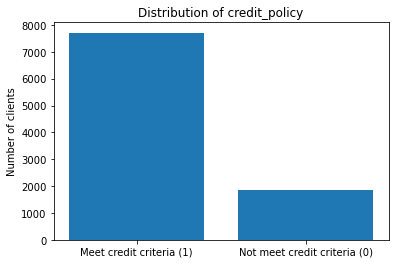

In [17]:
# Calculate percentage of meet/not meet credit policy 
print('Meet credit criteria', round(dataset['credit_policy'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')
print('Not meet credit criteria', round(dataset['credit_policy'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')

# Creat bar plot Distribution of credit_policy
x = ['Meet credit criteria (1)', 'Not meet credit criteria (0)']
y = dataset['credit_policy'].value_counts() 
plt.bar(x,y)

plt.ylabel('Number of clients')
plt.title('Distribution of credit_policy')
plt.show()

not_fully_paid     0     1
credit_policy             
0               1349   519
1               6696  1014


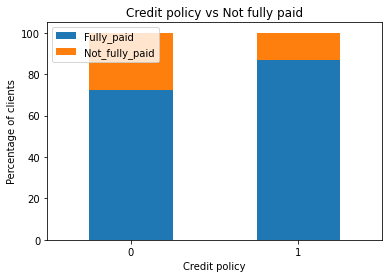

In [18]:
# Cross Calculation bt credit_policy and not_fully_paid
print(pd.crosstab(dataset.credit_policy,dataset.not_fully_paid)) # credit_policy = x, not_fully_paid = y

# Plot stacked bar of credit policy and not fully paid (by percentage)
pd.crosstab(dataset.credit_policy,dataset.not_fully_paid).apply(lambda r: r*100/r.sum(), axis=1).plot(kind="bar", stacked=True)
plt.title('Credit policy vs Not fully paid')
plt.xlabel('Credit policy')
plt.ylabel('Percentage of clients')
plt.legend(["Fully_paid", "Not_fully_paid"])
plt.xticks(rotation=0)
plt.show()

# fico

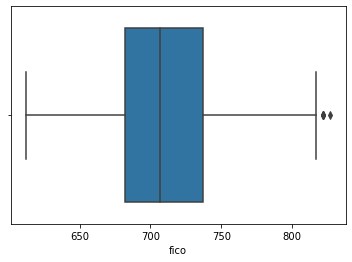

In [19]:
# build box plot of fico
sns.boxplot(x = dataset['fico']);

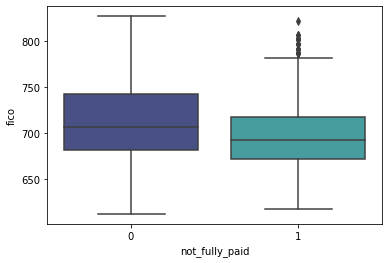

In [20]:
# FICO build box plot of fico vs not_fully_paid:
sns.boxplot(x ='not_fully_paid', y ='fico', data=dataset, palette='mako');

In [21]:
df_not_fully_paid = dataset[(dataset.not_fully_paid ==1)]

In [22]:
q3 = df_not_fully_paid. quantile(0.75)
print (q3)

credit_policy            1.000000
int_rate                 0.148200
installment            491.300000
log_annual_inc          11.276633
dti                     18.830000
fico                   717.000000
days_with_cr_line     5580.041667
revol_bal            20616.000000
revol_util              77.000000
inq_last_6mths           3.000000
delinq_2yrs              0.000000
pub_rec                  0.000000
not_fully_paid           1.000000
Name: 0.75, dtype: float64


In [23]:
q1 = df_not_fully_paid. quantile(0.25)
print(q1)

credit_policy           0.000000
int_rate                0.115400
installment           168.640000
log_annual_inc         10.491274
dti                     7.830000
fico                  672.000000
days_with_cr_line    2759.958333
revol_bal            3323.000000
revol_util             29.900000
inq_last_6mths          0.000000
delinq_2yrs             0.000000
pub_rec                 0.000000
not_fully_paid          1.000000
Name: 0.25, dtype: float64


# int_rate

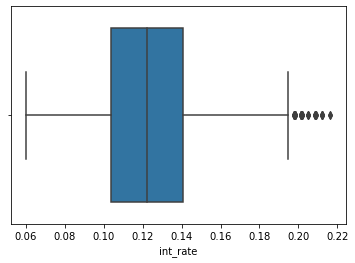

In [24]:
# build box plot of int_rate:
sns.boxplot(x = dataset['int_rate']);

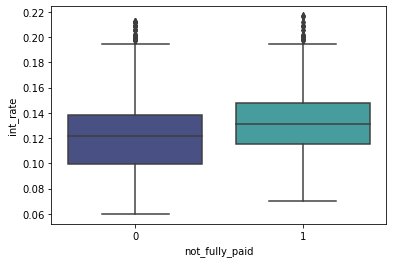

In [25]:
# build box plot of int_rate vs not_fully_paid:
sns.boxplot(x ='not_fully_paid', y ='int_rate', data=dataset, palette='mako');

In [26]:
df_int_rate = dataset[(dataset.int_rate <= 0.1)] 

In [27]:
df_int_rate['not_fully_paid'].value_counts()
print('Not fully paid', round(df_int_rate['not_fully_paid'].value_counts()[1]/len(df_int_rate) * 100,2), '% of the dataset')

Not fully paid 7.41 % of the dataset


# inq_last_6mths

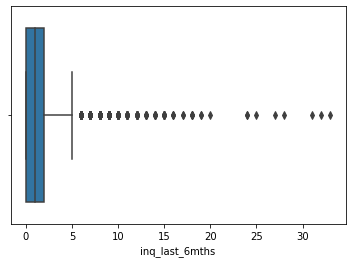

In [28]:
# build box plot of inq_last_6mths:
sns.boxplot(x = dataset['inq_last_6mths']);

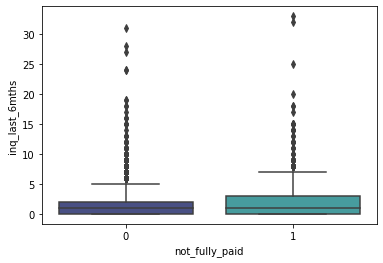

In [29]:
# build box plot of inq_last_6mths vs not_fully_paid:
sns.boxplot(x = 'not_fully_paid',y ='inq_last_6mths', data=dataset, palette='mako');
#Again, the two groups are similar, therefor no need to remove outliers, as they are present in both groups.

In [30]:
df_inq = dataset[(dataset.inq_last_6mths > 2)]
print('Not fully paid loans with more than 2 inquires in the last 6 month is',
round(df_inq['not_fully_paid'].value_counts()[1]/len(df_inq)* 100,2), '% of all loans with more than 2 inquires')

Not fully paid loans with more than 2 inquires in the last 6 month is 25.58 % of all loans with more than 2 inquires


In [31]:
df_inq = dataset[(dataset.inq_last_6mths > 3)]
print('Not fully paid loans with inquire in the last 6 month',
round(df_inq['not_fully_paid'].value_counts()[1]/len(df_inq)* 100,2), '% of all loans with more than 3 inquires')

Not fully paid loans with inquire in the last 6 month 28.92 % of all loans with more than 3 inquires


# relationship bt int_rate, fico and class attribute

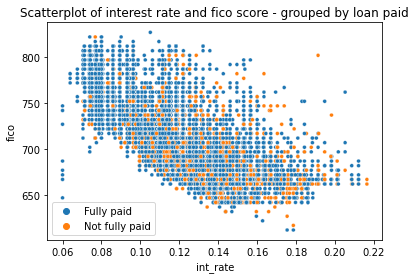

In [32]:
ax = sns.scatterplot(data=dataset, x='int_rate', y='fico', hue='not_fully_paid', alpha=1, s = 15)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Fully paid','Not fully paid'], )
plt.title('Scatterplot of interest rate and fico score - grouped by loan paid', size=12);

# relationship bt credit_policy, int_rate, fico and class attribute

In [33]:
#clients that do not pass credit policy + int_rate >0.1 (first_quantile) + fico <737 (third quantile)
df_10 = dataset[(dataset.int_rate > 0.1) & (dataset.fico < 737) & (dataset.credit_policy ==0) ] 
print('Not fully paid loans that do not meet credit policy with interest >0.1 and fico < 737 equal', 
      round(df_10['not_fully_paid'].value_counts()[1]/len(df_10)* 100,2), '% of the dataset')

Not fully paid loans that do not meet credit policy with interest >0.1 and fico < 737 equal 28.59 % of the dataset


In [34]:
#clients that do not pass credit policy + int_rate <=0.1 (first_quantile) + fico >737 (third quantile)
df_11 = dataset[(dataset.int_rate <= 0.1) & (dataset.fico >= 737) & (dataset.credit_policy ==0) ] 
print('Not fully paid loans that do not meet credit policy with interest <=0.1 and fico >= 737 equal', 
      round(df_11['not_fully_paid'].value_counts()[1]/len(df_11)* 100,2), '% of the dataset')

Not fully paid loans that do not meet credit policy with interest <=0.1 and fico >= 737 equal 11.11 % of the dataset


In [35]:
#clients that pass credit policy + int_rate >0.1 (first_quantile) + fico <737 (third quantile)
df_12 = dataset[(dataset.int_rate > 0.1) & (dataset.fico < 737) & (dataset.credit_policy ==1) ] 
print('Not fully paid loans that meet credit policy with interest >0.1 and fico < 737 equal', 
      round(df_12['not_fully_paid'].value_counts()[1]/len(df_12)* 100,2), '% of the dataset')

Not fully paid loans that meet credit policy with interest >0.1 and fico < 737 equal 15.72 % of the dataset


In [36]:
#clients that pass credit policy + int_rate <=0.1 (first_quantile) + fico >737 (third quantile)
df_12 = dataset[(dataset.int_rate <= 0.1) & (dataset.fico >= 737) & (dataset.credit_policy ==1) ] 
print('Not fully paid loans that  meet credit policy with interest <=0.1 and fico >= 737 equal', 
      round(df_12['not_fully_paid'].value_counts()[1]/len(df_12)* 100,2), '% of the dataset')

Not fully paid loans that  meet credit policy with interest <=0.1 and fico >= 737 equal 5.79 % of the dataset


# 2. DATA PREPARATION

# 2.1. Log transformation to reduce skewness of some attributes

In [37]:
# just for 'installment', 'fico', 'days_with_cr_line', 'revol_bal'
#no log transformation for other attributes because they don't follow log-normal distribution -> log transformation worsen the skewness 

dataset['installment'] = np.log(dataset['installment'])
dataset['fico'] = np.log(dataset['fico'])
dataset['days_with_cr_line'] = np.log(dataset['days_with_cr_line'])

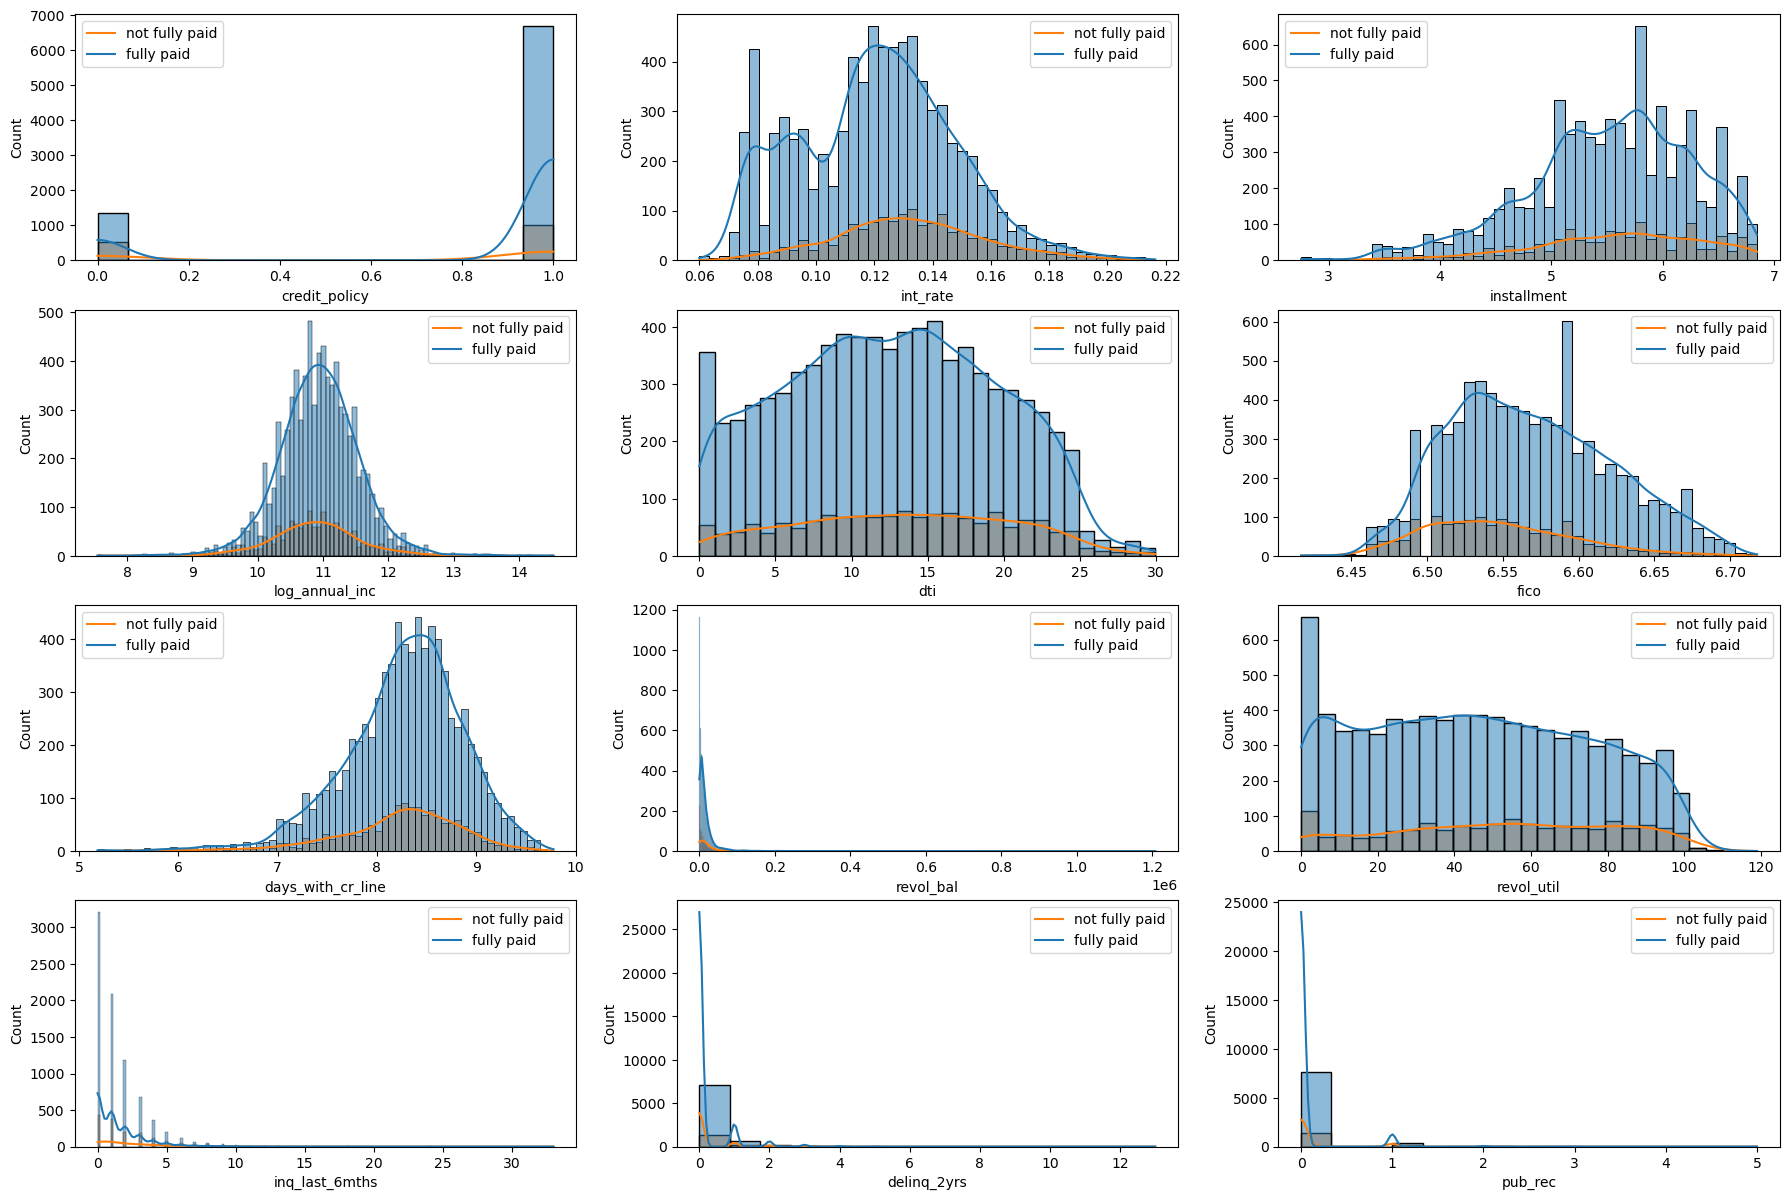

In [38]:
# Histogram distribution of numerical variables after log transformation

numeric_features = dataset.select_dtypes(['int64', 'float64']).columns[:-1]

# Creating figure and axes
fig, ax = plt.subplots(4,3, figsize=(22,15), dpi=100)
ax=ax.ravel()

# Loop through columns and creating histograms comparing the two groups
count=0
for i in numeric_features:
    sns.histplot(data=dataset, x=i, hue='not_fully_paid', ax=ax[count], kde=True, legend=True, color='green')
    ax[count].legend(['not fully paid','fully paid'])
    count+=1

# 2.2. Seperate class attribute from other attributes

In [39]:
# create 2 entities (b/c ML algorithms will expect these 2 entities as their inputs):

X = dataset.iloc[:, :-1].values # create a matrix of independant variables (features)
y = dataset.iloc[:, -1].values # create dependant variable vector (respond vector)

# 2.3.  One hot encoding

In [40]:
# tranforms categories data into binary (dummy variable) (b/c ML models works better with binary values)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# shape of X 
print("X.shape {}".format(X.shape))

X.shape (9578, 19)


In [41]:
print(X[0:5, :])

[[0.0 0.0 1.0 0.0 0.0 0.0 0.0 1 0.1189 6.720340775122173 11.35040654
  19.48 6.602587892189336 8.637631956698858 28854 52.1 0 0 0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 1 0.1071 5.430310076006534 11.08214255
  14.29 6.561030665896573 7.9229859587111955 33623 76.7 0 0 0]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 1 0.1357 5.904980303886204 10.37349118
  11.63 6.525029657843462 8.457443187010464 3511 25.6 1 0 0]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 1 0.1008 5.08969290133303 11.35040654 8.1
  6.568077911411976 7.90099161965112 33667 73.2 1 0 0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 1 0.1426 4.6339519874135435 11.29973224
  14.97 6.502790045915623 8.310414994188292 4740 39.5 0 1 0]]


# 2.4. Train test split

In [42]:
#Using stratify split to have the same propotion of faulters/non_faulters in train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 1)

In [43]:
# shape of X_train, y_train, X_test, y_test
print("X_train.shape {}".format(X_train.shape))
print("y_train.shape {}".format(y_train.shape))
print("X_test.shape {}".format(X_test.shape))
print("y_test.shape {}".format(y_test.shape))

X_train.shape (7662, 19)
y_train.shape (7662,)
X_test.shape (1916, 19)
y_test.shape (1916,)


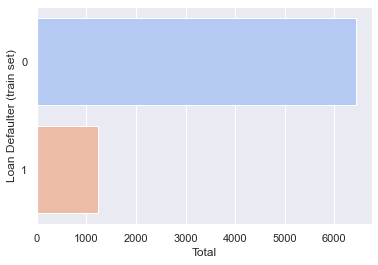

In [44]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train,palette="coolwarm")
plt.ylabel('Loan Defaulter (train set)')
plt.xlabel('Total')
plt.show()

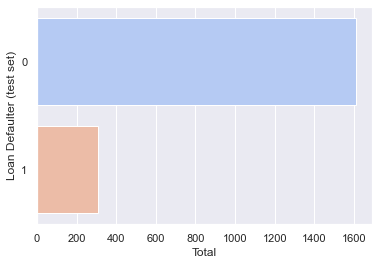

In [45]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_test,palette="coolwarm")
plt.ylabel('Loan Defaulter (test set)')
plt.xlabel('Total')
plt.show()

In [46]:
print(np.count_nonzero(y_train ==0))
print(np.count_nonzero(y_train ==1))
print(np.count_nonzero(y_test ==0))
print(np.count_nonzero(y_test ==1))
print("Proportion of defaulters/nondefaultes in train set: ", np.count_nonzero(y_train ==1)/np.count_nonzero(y_train ==0))
print("Proportion of defaulters/nondefaultes in test set: ", np.count_nonzero(y_test ==1)/np.count_nonzero(y_test ==0))

6436
1226
1609
307
Proportion of defaulters/nondefaultes in train set:  0.19049098819142324
Proportion of defaulters/nondefaultes in test set:  0.19080174021131138


# 2.5. Balancing dataset using SMOTE

In [47]:
from imblearn.over_sampling import SMOTE # use SMOTE to oversampling training dataset 
sm = SMOTE(random_state=1)
X_train, y_train = sm.fit_resample(X_train, y_train)

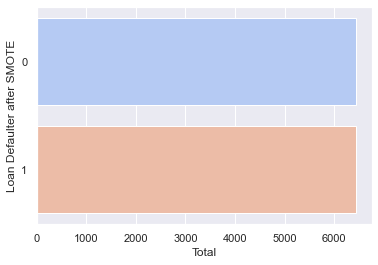

In [48]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train,palette="coolwarm")
plt.ylabel('Loan Defaulter after SMOTE')
plt.xlabel('Total')
plt.show()

In [49]:
# shape of X_train, y_train after SMOTE
print("X_train.shape {}".format(X_train.shape))
print("y_train.shape {}".format(y_train.shape))

X_train.shape (12872, 19)
y_train.shape (12872,)


# 2.6. Feature Scaling (Standardization)

In [50]:
# Apply standardization to transform all features to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 7:] = sc.fit_transform(X_train[:, 7:])
X_test[:, 7:] = sc.transform(X_test[:, 7:])

In [51]:
print(X_train[0:3])

[[ 0.          0.          1.          0.          0.          0.
   0.         -1.84633448  2.18243922  0.51097595 -0.24164952  1.64193838
  -1.91383131  0.19515932 -0.20674949  0.55665588 -0.37643056  1.68317138
  -0.29284479]
 [ 1.          0.          0.          0.          0.          0.
   0.          0.63519349 -1.98984175 -1.94989995  0.03534536 -1.41493394
   1.47172426  1.15665088 -0.09991644 -0.58634975 -0.37643056 -0.33434724
  -0.29284479]
 [ 0.          0.          1.          0.          0.          0.
   0.          0.63519349  0.13481834 -0.19503533 -1.10812912  1.09004568
  -1.12891758  0.69677375 -0.08725603  0.82180451 -0.79058842 -0.33434724
  -0.29284479]]


# 2.7. feature selection RFE (Recursive Feature Elimination)

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression # adopt the LR as algorithm to rank the importance of features

In [53]:
# FS using RFE: logistic regression 12 features
model_lr = LogisticRegression()
recur_fe = RFE(model_lr,n_features_to_select=12) # choose 12 based on correlation heatmap
Feature = recur_fe.fit(X_train,y_train)
print("number of features {}".format(Feature.n_features_) )
print("selected features are {}".format(Feature.support_))
print("Feature ranking is as follow {}".format(Feature.ranking_))

number of features 12
selected features are [False  True  True  True  True  True  True  True False  True  True False
  True False  True False  True False False]
Feature ranking is as follow [5 1 1 1 1 1 1 1 7 1 1 8 1 2 1 6 1 3 4]


In [54]:
# create new numpy array to for all selected feature for training data
X_train_selected = recur_fe.transform(X_train)
print("X_train.shape {}".format(X_train.shape))
print("X_train_selected.shape {}".format(X_train_selected.shape))

X_train.shape (12872, 19)
X_train_selected.shape (12872, 12)


In [55]:
# apply RFE model to test data #  (only tranform)
X_test_selected = recur_fe.transform(X_test)
print("X_test.shape {}".format(X_test.shape))
print("X_test_selected.shape {}".format(X_test_selected.shape))

X_test.shape (1916, 19)
X_test_selected.shape (1916, 12)


# 3. MODEL TRAINING, TESTING AND EVALUATION

# 3.1 KNN

In [56]:
# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5)
classifier_KNN.fit(X_train_selected, y_train) # fit the model to the train datasets

# predicting the testing set result
y_pred_test_KNN = classifier_KNN.predict(X_test_selected)
# confusion matrix on testing set
cm_test_KNN = confusion_matrix(y_test, y_pred_test_KNN)

# print report of evaluation metrix
print("Confusion Matrix KNN: \n {}". format(cm_test_KNN))
print()
print("--------------------------------------------------------")
print("Classification Report KNN:")
print()
print(classification_report(y_test, y_pred_test_KNN))

# print other metrix
precision_KNN,recall_KNN,fscore_KNN,support = precision_recall_fscore_support(y_test,y_pred_test_KNN,average='macro')
accuracy_KNN = accuracy_score(y_test, y_pred_test_KNN)
print("Accuracy KNN: {:.2f} %".format(accuracy_KNN*100))
print('Precision KNN: {:.2f}%'.format(precision_KNN*100))
print('Recall KNN : {:.2f}%'.format(recall_KNN*100))
print('F-score KNN  : {:.2f}%'.format(fscore_KNN*100))

Confusion Matrix KNN: 
 [[1180  429]
 [ 203  104]]

--------------------------------------------------------
Classification Report KNN:

              precision    recall  f1-score   support

           0       0.85      0.73      0.79      1609
           1       0.20      0.34      0.25       307

    accuracy                           0.67      1916
   macro avg       0.52      0.54      0.52      1916
weighted avg       0.75      0.67      0.70      1916

Accuracy KNN: 67.01 %
Precision KNN: 52.42%
Recall KNN : 53.61%
F-score KNN  : 51.82%


# 3.2  Logistic Regression

In [57]:
# Traing LR on the train dataset(selected features)
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()
classifier_LR.fit(X_train_selected, y_train) # fit the model to the train datasets

# predicting the testing set result
y_pred_test_LR = classifier_LR.predict(X_test_selected)
# confusion matrix on testing set
cm_test_LR = confusion_matrix(y_test, y_pred_test_LR)

# print report of evaluation metrix
print("Confusion Matrix LR: \n {}". format(cm_test_LR))
print()
print("--------------------------------------------------------")
print("Classification Report LR:")
print()
print(classification_report(y_test, y_pred_test_LR))

# print other metrix
precision_LR,recall_LR,fscore_LR,support = precision_recall_fscore_support(y_test,y_pred_test_LR,average='macro')
accuracy_LR = accuracy_score(y_test, y_pred_test_LR)
print("Accuracy Logistic Regression: {:.2f} %".format(accuracy_LR*100))
print('Precision Logistic Regression: {:.2f}%'.format(precision_LR*100))
print('Recall Logistic Regression : {:.2f}%'.format(recall_LR*100))
print('F-score Logistic Regression : {:.2f}%'.format(fscore_LR*100))

Confusion Matrix LR: 
 [[1040  569]
 [ 125  182]]

--------------------------------------------------------
Classification Report LR:

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1609
           1       0.24      0.59      0.34       307

    accuracy                           0.64      1916
   macro avg       0.57      0.62      0.55      1916
weighted avg       0.79      0.64      0.68      1916

Accuracy Logistic Regression: 63.78 %
Precision Logistic Regression: 56.75%
Recall Logistic Regression : 61.96%
F-score Logistic Regression : 54.69%


# 3.3 NAIVE BAYES 

In [58]:
# Training Naive Bayes model on the train dataset
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train_selected, y_train) # fit the model to the train datasets

# predicting the testing set result
y_pred_test_NB = classifier_NB.predict(X_test_selected)

# confusion matrix on testing set
cm_test_NB = confusion_matrix(y_test, y_pred_test_NB)

# print report of evaluation metrix
print("Confusion Matrix NB: \n {}". format(cm_test_NB))
print()
print("--------------------------------------------------------")
print("Classification Report NB:")
print()
print(classification_report(y_test, y_pred_test_NB))


# print other metrix
precision_NB,recall_NB,fscore_NB,support_NB = precision_recall_fscore_support(y_test,y_pred_test_NB,average='macro')
accuracy_NB = accuracy_score(y_test, y_pred_test_NB)
print("Accuracy Naive Bayes: {:.2f} %".format(accuracy_NB*100))
print('Precision Naive Bayes: {:.2f}%'.format(precision_NB*100))
print('Recall Naive Bayes: {:.2f}%'.format(recall_NB*100))
print('F-score Naive Bayes: {:.2f}%'.format(fscore_NB*100))

Confusion Matrix NB: 
 [[1234  375]
 [ 187  120]]

--------------------------------------------------------
Classification Report NB:

              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1609
           1       0.24      0.39      0.30       307

    accuracy                           0.71      1916
   macro avg       0.56      0.58      0.56      1916
weighted avg       0.77      0.71      0.73      1916

Accuracy Naive Bayes: 70.67 %
Precision Naive Bayes: 55.54%
Recall Naive Bayes: 57.89%
F-score Naive Bayes: 55.69%


# 3.4 SVM

In [59]:
# Training the SVM model
from sklearn.svm import SVC
classifier_SVM = SVC(random_state = 0)
classifier_SVM.fit(X_train_selected, y_train) # fit the model to the train datasets

# predicting the testing set result
y_pred_test_SVM = classifier_SVM.predict(X_test_selected)

# confusion matrix on testing set
cm_test_SVM = confusion_matrix(y_test, y_pred_test_SVM)

# print report of evaluation metrix
print("Confusion Matrix SVM: \n {}". format(cm_test_SVM))
print()
print("--------------------------------------------------------")
print("Classification Report SVM:")
print()
print(classification_report(y_test, y_pred_test_SVM))

# other metrix
precision_SVM,recall_SVM,fscore_SVM,support_SVM = precision_recall_fscore_support(y_test,y_pred_test_SVM,average='macro')
accuracy_SVM = accuracy_score(y_test, y_pred_test_SVM)
print('Accuracy SVM: {:.2f} %'.format(accuracy_SVM*100))
print ('Precision SVM : {:.2f}%'.format(precision_SVM*100))
print ('Recall SVM : {:.2f}%'.format(recall_SVM*100))
print ('F-score SVM  : {:.2f}%'.format(fscore_SVM*100))

Confusion Matrix SVM: 
 [[1412  197]
 [ 232   75]]

--------------------------------------------------------
Classification Report SVM:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1609
           1       0.28      0.24      0.26       307

    accuracy                           0.78      1916
   macro avg       0.57      0.56      0.56      1916
weighted avg       0.77      0.78      0.77      1916

Accuracy SVM: 77.61 %
Precision SVM : 56.73%
Recall SVM : 56.09%
F-score SVM  : 56.36%


# 3.5 DECISION TREE

In [60]:
# Training DT model on train dataset
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier_DT.fit(X_train_selected, y_train) # fit the model to the train datasets

# predicting the testing set result
y_pred_test_DT = classifier_DT.predict(X_test_selected)

# confusion matrix 
cm_test_DT = confusion_matrix(y_test, y_pred_test_DT)

# print report of evaluation metrix
print("Confusion Matrix DT: \n {}". format(cm_test_DT))
print()
print("--------------------------------------------------------")
print("Classification Report DT:")
print()
print(classification_report(y_test, y_pred_test_DT))

precision_DT,recall_DT,fscore_DT,support=precision_recall_fscore_support(y_test,y_pred_test_DT,average='macro')
accuracy_DT = accuracy_score(y_test, y_pred_test_DT)
print("Accuracy DT : {:.2f} %".format(accuracy_DT*100))
print ('Precision DT : {:.2f}%'.format(precision_DT*100))
print ('Recall DT : {:.2f}%'.format(recall_DT*100))
print ('F-score DT  : {:.2f}%'.format(fscore_DT*100))

Confusion Matrix DT: 
 [[1330  279]
 [ 235   72]]

--------------------------------------------------------
Classification Report DT:

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1609
           1       0.21      0.23      0.22       307

    accuracy                           0.73      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.75      0.73      0.74      1916

Accuracy DT : 73.17 %
Precision DT : 52.75%
Recall DT : 53.06%
F-score DT  : 52.85%


# 3.6 RANDOM FOREST

In [61]:
# Training RF model on train dataset
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train_selected, y_train) # fit the model to the train datasets

# predicting the testing set result
y_pred_test_RF = classifier_RF.predict(X_test_selected)

# confusion matrix on testing set
cm_test_RF = confusion_matrix(y_test, y_pred_test_RF)

# print report of evaluation metrix
print("Confusion Matrix RF: \n {}". format(cm_test_RF))
print()
print("--------------------------------------------------------")
print("Classification Report RF:")
print()
print(classification_report(y_test, y_pred_test_RF))

precision_RF,recall_RF,fscore_RF,support=precision_recall_fscore_support(y_test,y_pred_test_RF,average='macro')
accuracy_RF = accuracy_score(y_test, y_pred_test_RF)
print("Accuracy RF : {:.2f} %".format(accuracy_RF*100))
print ('Precision RF : {:.2f}%'.format(precision_RF*100))
print ('Recall RF : {:.2f}%'.format(recall_RF*100))
print ('F-score RF  : {:.2f}%'.format(fscore_RF*100))

Confusion Matrix RF: 
 [[1557   52]
 [ 285   22]]

--------------------------------------------------------
Classification Report RF:

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1609
           1       0.30      0.07      0.12       307

    accuracy                           0.82      1916
   macro avg       0.57      0.52      0.51      1916
weighted avg       0.76      0.82      0.78      1916

Accuracy RF : 82.41 %
Precision RF : 57.13%
Recall RF : 51.97%
F-score RF  : 50.89%


# 3.7 XGBOOST

In [62]:
# Creating RF model
from xgboost import XGBClassifier
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train_selected, y_train) # fit the model to the train datasets

# predicting the testing set result
y_pred_test_XGB = classifier_XGB.predict(X_test_selected)

# confusion matrix on testing set
cm_test_XGB = confusion_matrix(y_test, y_pred_test_XGB)

# print report of evaluation metrix
print("Confusion Matrix XGB: \n {}". format(cm_test_XGB))
print()
print("--------------------------------------------------------")
print("Classification Report XGB:")
print()
print(classification_report(y_test, y_pred_test_XGB))

precision_XGB,recall_XGB,fscore_XGB,support=precision_recall_fscore_support(y_test,y_pred_test_XGB,average='macro')
accuracy_XGB = accuracy_score(y_test, y_pred_test_XGB)
print("Accuracy XGB : {:.2f} %".format(accuracy_XGB*100))
print ('Precision XGB : {:.2f}%'.format(precision_XGB*100))
print ('Recall XGB : {:.2f}%'.format(recall_XGB*100))
print ('F-score XGB  : {:.2f}%'.format(fscore_XGB*100))

Confusion Matrix XGB: 
 [[1562   47]
 [ 280   27]]

--------------------------------------------------------
Classification Report XGB:

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1609
           1       0.36      0.09      0.14       307

    accuracy                           0.83      1916
   macro avg       0.61      0.53      0.52      1916
weighted avg       0.77      0.83      0.78      1916

Accuracy XGB : 82.93 %
Precision XGB : 60.64%
Recall XGB : 52.94%
F-score XGB  : 52.35%


# 4. MODEL COMPARISON

In [65]:
compare_models = pd.DataFrame({'Model': ['KNN','Logistic Regression',
                                        'SVM', 'Naive Bayes',
                                        'Decision Tree', 'Random Forest', 'XGBoost'],
                              'Recall': [recall_KNN*100, recall_LR*100,
                                         recall_SVM*100, recall_NB*100,
                                         recall_DT*100, recall_RF*100, recall_XGB*100],
                        'Accuracy': [accuracy_KNN*100, accuracy_LR*100,
                                     accuracy_SVM*100, accuracy_NB*100,
                                     accuracy_DT*100, accuracy_RF*100, accuracy_XGB*100]})
compare_models = compare_models.round(decimals = 2)
compare_models.sort_values(by='Recall', ascending=False)

,Model,Recall,Accuracy
1,Logistic Regression,61.96,63.78
3,Naive Bayes,57.89,70.67
2,SVM,56.09,77.61
0,KNN,53.61,67.01
4,Decision Tree,53.06,73.17
6,XGBoost,52.94,82.93
5,Random Forest,51.97,82.41


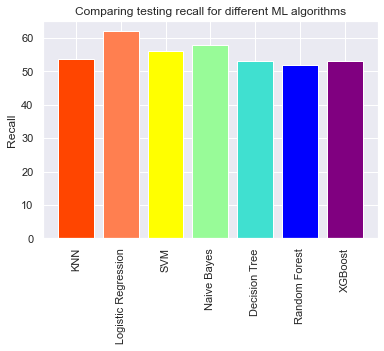

In [66]:
# Comparing recall for different ML algorithms
x = compare_models ["Model"]
y = compare_models ["Recall"]
c = ['orangered','coral','yellow','palegreen','turquoise','blue','purple']
plt.bar(x,y, color = c)
plt.xticks(ticks = x, labels = compare_models ["Model"], rotation = 'vertical')
plt.ylabel('Recall')
plt.title('Comparing testing recall for different ML algorithms')
plt.show()

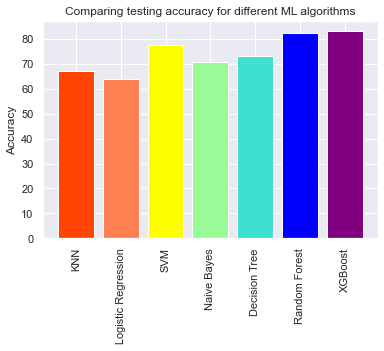

In [67]:
# Comparing accuracy for different ML algorithms
x = compare_models ["Model"]
y = compare_models ["Accuracy"]
c = ['orangered','coral','yellow','palegreen','turquoise','blue','purple']

plt.bar(x,y, color = c)
plt.xticks(ticks = x, labels = compare_models ["Model"], rotation = 'vertical')
plt.ylabel('Accuracy')
plt.title('Comparing testing accuracy for different ML algorithms')
plt.show()